In [1]:
# Major Libraries
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
dataset = pd.read_csv("diabetic_data.csv", na_values="?")

C:\Users\CHANDIMA\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print(type(dataset))

<class 'pandas.core.frame.DataFrame'>


In [4]:
print(dataset.shape)

(101766, 50)


In [5]:
print(dataset.columns)

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide_metformin', 'glipizide_metformin',
       'glimepiride_pioglitazone', 'metformin_rosiglitazone',
       'metformin_pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')


In [6]:
print(dataset.dtypes)

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

Categorical data should be encoded.


In [7]:
# Print contents of dataset
dataset.head(5)  # First 05 rows of the dataset

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide_metformin,glipizide_metformin,glimepiride_pioglitazone,metformin_rosiglitazone,metformin_pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [8]:
dataset.tail(5)  

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide_metformin,glipizide_metformin,glimepiride_pioglitazone,metformin_rosiglitazone,metformin_pioglitazone,change,diabetesMed,readmitted
101761,443847548,100162476,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),NaN,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),NaN,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101765,443867222,175429310,Caucasian,Male,[70-80),NaN,1,1,7,6,...,No,No,No,No,No,No,No,No,No,NO


# Data Preprocessing

Features like "encounter_id", "patient_nbr" and "payer_code" are not contributed to decide the readmission status. They can be removed.

Missing data should be replaced or removed.
"age" should be label-encoded into an integer.
Useless features should be removed.
'diag_1', 'diag_2', 'diag_3' can be indicated as ICD9 codes. (Primary, Secondary & Tertiary Medica Diagnoses).

Categorical data should be encoded.

Feature Scaling should be applied.



In [9]:
print(dataset.isnull().sum()) # How many missing values

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [10]:
# how many features have missing values, and how many values they're missing:
def percent_null(data):
    # Returns a Pandas series of what percentage of each feature of 'data' contains NaN values
    pc_null = data.apply(pd.Series.isnull).apply(lambda x: 100*round(len(x[x==True])/len(x), 4))
    return pc_null[pc_null!=0]
percent_null(dataset)

race                  2.23
weight               96.86
payer_code           39.56
medical_specialty    49.08
diag_1                0.02
diag_2                0.35
diag_3                1.40
dtype: float64

As 97% of data is missing. "weight" can be removed.
"payer_code" has no effect on the readmission status. So it can be removed.

"diag_1, diag_2, and diag_3" records with missing values will be ignored in the final analysis.


In [11]:
dataset['race'].value_counts(dropna=False).head()

Caucasian          76099
AfricanAmerican    19210
NaN                 2273
Hispanic            2037
Other               1506
Name: race, dtype: int64

All the rows of "race" with missing values will be removed.

In [12]:
dataset['medical_specialty'].value_counts(dropna=False).head()

NaN                       49949
InternalMedicine          14635
Emergency/Trauma           7565
Family/GeneralPractice     7440
Cardiology                 5352
Name: medical_specialty, dtype: int64

As the majority of the data is missing, "medical_specialty" will be ignored in the final analysis.

In [13]:
# allow plots to appear in the notebook
%matplotlib inline


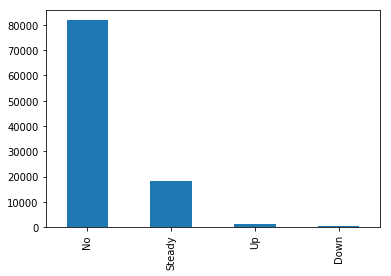

In [14]:
dataset.metformin.value_counts().plot(kind='bar')

In [15]:
dataset['metformin'].value_counts().head()

No        81778
Steady    18346
Up         1067
Down        575
Name: metformin, dtype: int64

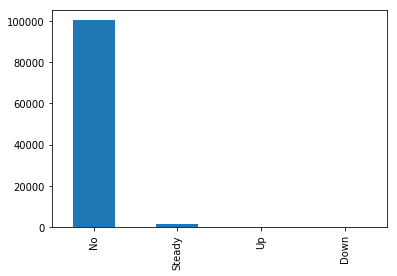

In [16]:
dataset.repaglinide.value_counts().plot(kind='bar')

In [17]:
dataset['repaglinide'].value_counts().head()

No        100227
Steady      1384
Up           110
Down          45
Name: repaglinide, dtype: int64

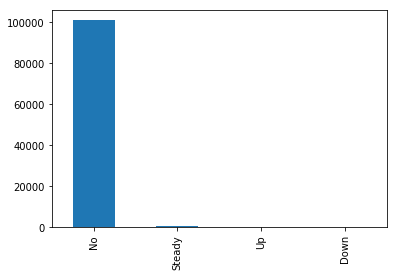

In [18]:
dataset.nateglinide.value_counts().plot(kind='bar')

In [19]:
dataset['nateglinide'].value_counts().head()

No        101063
Steady       668
Up            24
Down          11
Name: nateglinide, dtype: int64

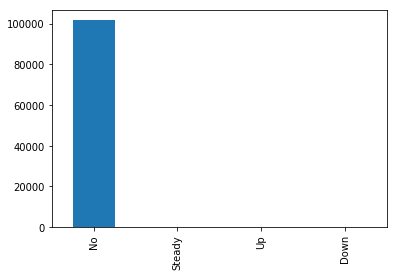

In [20]:
dataset.chlorpropamide.value_counts().plot(kind='bar')

In [21]:
dataset['chlorpropamide'].value_counts().head()

No        101680
Steady        79
Up             6
Down           1
Name: chlorpropamide, dtype: int64

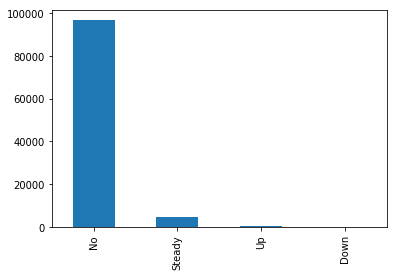

In [22]:
dataset.glimepiride.value_counts().plot(kind='bar')

In [23]:
dataset['glimepiride'].value_counts().head()

No        96575
Steady     4670
Up          327
Down        194
Name: glimepiride, dtype: int64

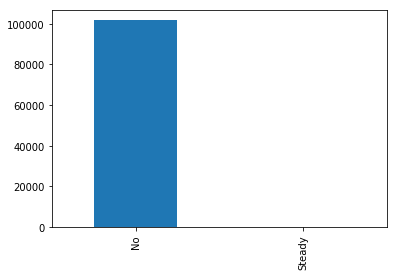

In [24]:
dataset.acetohexamide.value_counts().plot(kind='bar')

In [25]:
dataset['acetohexamide'].value_counts().head()

No        101765
Steady         1
Name: acetohexamide, dtype: int64

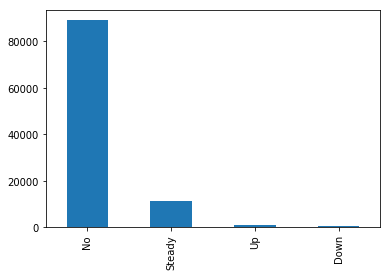

In [26]:
dataset.glipizide.value_counts().plot(kind='bar')

In [27]:
dataset['glipizide'].value_counts().head()

No        89080
Steady    11356
Up          770
Down        560
Name: glipizide, dtype: int64

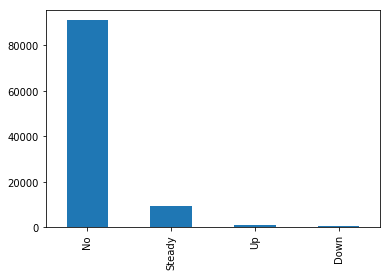

In [28]:
dataset.glyburide.value_counts().plot(kind='bar')

In [29]:
dataset['glyburide'].value_counts().head()

No        91116
Steady     9274
Up          812
Down        564
Name: glyburide, dtype: int64

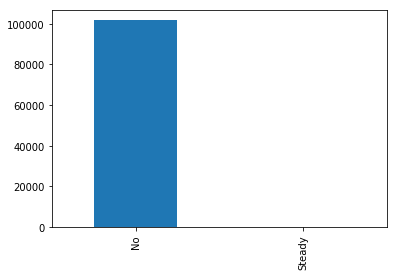

In [30]:
dataset.tolbutamide.value_counts().plot(kind='bar')

In [31]:
dataset['tolbutamide'].value_counts().head()

No        101743
Steady        23
Name: tolbutamide, dtype: int64

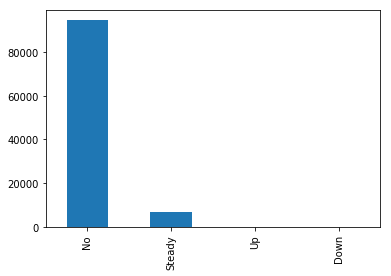

In [32]:
dataset.pioglitazone.value_counts().plot(kind='bar')

In [33]:
dataset['pioglitazone'].value_counts().head()

No        94438
Steady     6976
Up          234
Down        118
Name: pioglitazone, dtype: int64

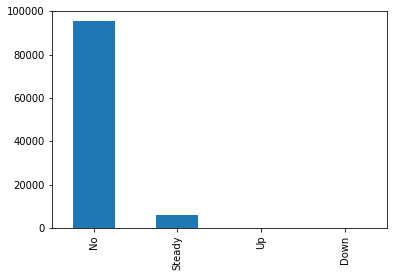

In [34]:
dataset.rosiglitazone.value_counts().plot(kind='bar')

In [35]:
dataset['rosiglitazone'].value_counts().head()

No        95401
Steady     6100
Up          178
Down         87
Name: rosiglitazone, dtype: int64

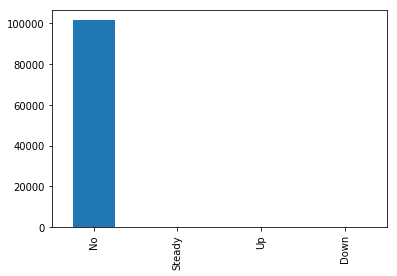

In [36]:
dataset.acarbose.value_counts().plot(kind='bar')

In [37]:
dataset['acarbose'].value_counts().head()

No        101458
Steady       295
Up            10
Down           3
Name: acarbose, dtype: int64

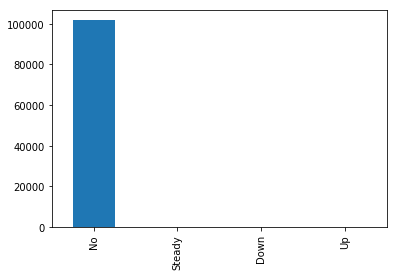

In [38]:
dataset.miglitol.value_counts().plot(kind='bar')

In [39]:
dataset['miglitol'].value_counts().head()

No        101728
Steady        31
Down           5
Up             2
Name: miglitol, dtype: int64

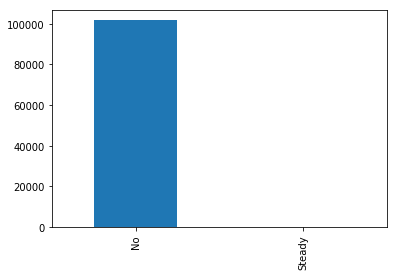

In [40]:
dataset.troglitazone.value_counts().plot(kind='bar')

In [41]:
dataset['troglitazone'].value_counts().head()

No        101763
Steady         3
Name: troglitazone, dtype: int64

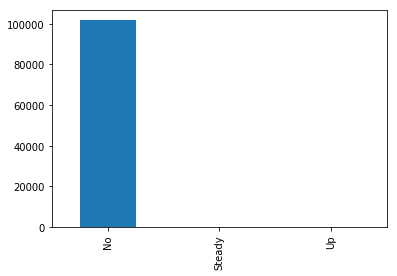

In [42]:
dataset.tolazamide.value_counts().plot(kind='bar')

In [43]:
dataset['tolazamide'].value_counts().head()

No        101727
Steady        38
Up             1
Name: tolazamide, dtype: int64

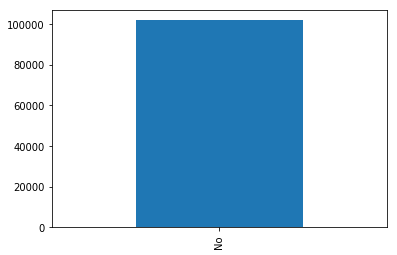

In [44]:
dataset.examide.value_counts().plot(kind='bar')

In [45]:
dataset['examide'].value_counts().head()

No    101766
Name: examide, dtype: int64

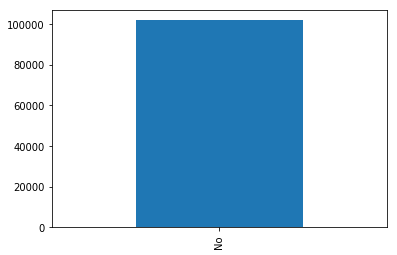

In [46]:
dataset.citoglipton.value_counts().plot(kind='bar')

In [47]:
dataset['citoglipton'].value_counts().head()

No    101766
Name: citoglipton, dtype: int64

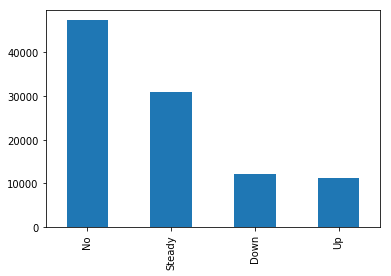

In [48]:
dataset.insulin.value_counts().plot(kind='bar')

The only medication, which has a significant variance.


In [49]:
dataset['insulin'].value_counts().head()

No        47383
Steady    30849
Down      12218
Up        11316
Name: insulin, dtype: int64

The only medication, which has a significant variance.

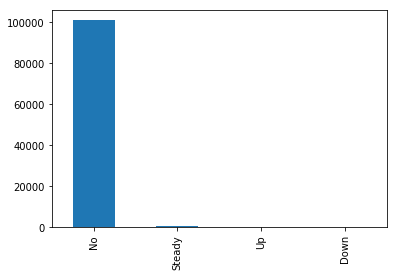

In [50]:
dataset.glyburide_metformin.value_counts().plot(kind='bar')

In [51]:
dataset['glyburide_metformin'].value_counts().head()

No        101060
Steady       692
Up             8
Down           6
Name: glyburide_metformin, dtype: int64

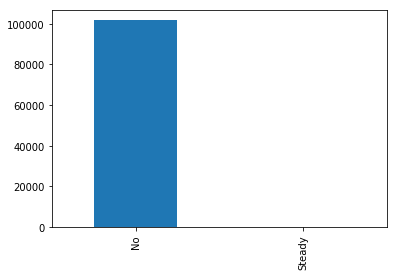

In [52]:
dataset.glipizide_metformin.value_counts().plot(kind='bar')

In [53]:
dataset['glipizide_metformin'].value_counts().head()

No        101753
Steady        13
Name: glipizide_metformin, dtype: int64

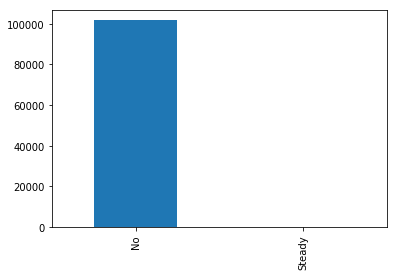

In [54]:
dataset.glimepiride_pioglitazone.value_counts().plot(kind='bar')

In [55]:
dataset['glimepiride_pioglitazone'].value_counts().head()

No        101765
Steady         1
Name: glimepiride_pioglitazone, dtype: int64

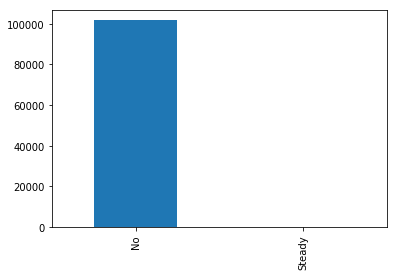

In [56]:
dataset.metformin_rosiglitazone.value_counts().plot(kind='bar')

In [57]:
dataset['metformin_rosiglitazone'].value_counts().head()

No        101764
Steady         2
Name: metformin_rosiglitazone, dtype: int64

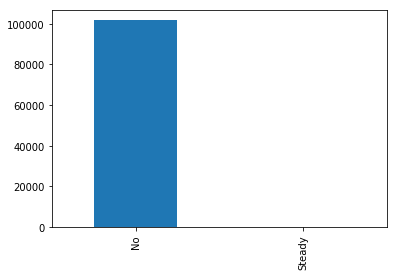

In [58]:
dataset.metformin_pioglitazone.value_counts().plot(kind='bar')

In [59]:
dataset['metformin_pioglitazone'].value_counts().head()

No        101765
Steady         1
Name: metformin_pioglitazone, dtype: int64

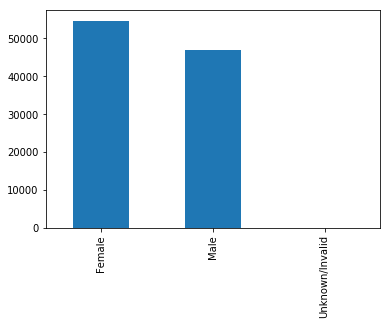

In [60]:
dataset.gender.value_counts().plot(kind='bar')

In [61]:
dataset['gender'].value_counts().head()

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

In [62]:
# In the feature "gender", there are 03 invalid data which should be removed.
dataset = dataset[dataset.gender != 'Unknown/Invalid']

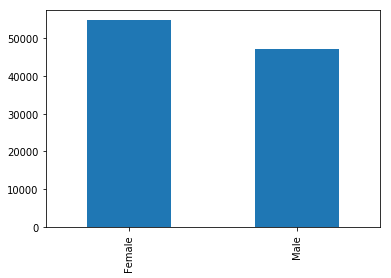

In [63]:
dataset.gender.value_counts().plot(kind='bar')

"gender" may have an effect on readmission status.

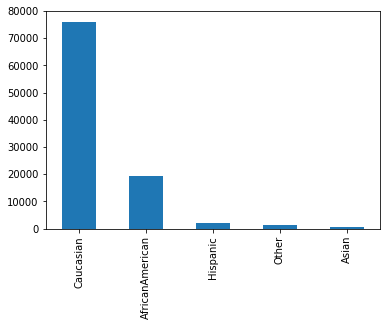

In [64]:
dataset.race.value_counts().plot(kind='bar')

"race" may have an impact for the readmission status.

In [65]:
dataset['race'].value_counts().head()

Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1505
Asian                641
Name: race, dtype: int64

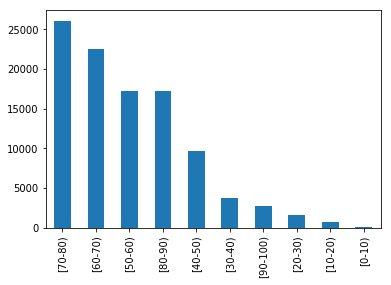

In [66]:
dataset.age.value_counts().plot(kind='bar')

"age" may have an effect on readmission status.

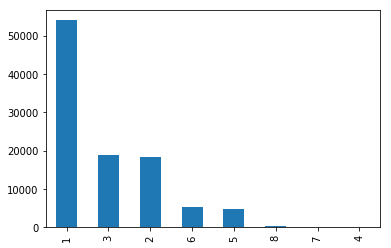

In [67]:
dataset.admission_type_id.value_counts().plot(kind='bar')

"admission_type_id" may have an effect.

In [68]:
dataset['admission_type_id'].value_counts().head()

1    53988
3    18868
2    18480
6     5291
5     4785
Name: admission_type_id, dtype: int64

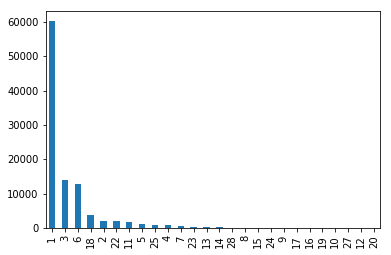

In [69]:
dataset.discharge_disposition_id.value_counts().plot(kind='bar')

"discharge_disposition_id" may have an effect.

In [70]:
dataset['discharge_disposition_id'].value_counts().head()

1     60232
3     13954
6     12902
18     3691
2      2128
Name: discharge_disposition_id, dtype: int64

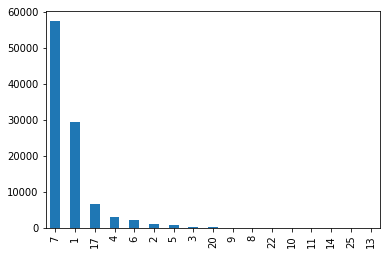

In [71]:
dataset.admission_source_id.value_counts().plot(kind='bar')

"admission_source_id" may have an effect.

In [72]:
dataset['admission_source_id'].value_counts().head()

7     57492
1     29564
17     6781
4      3187
6      2264
Name: admission_source_id, dtype: int64

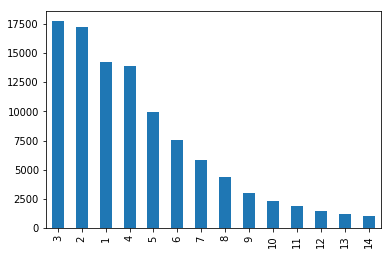

In [73]:
dataset.time_in_hospital.value_counts().plot(kind='bar')

"time_in_hospital" may have an effect.

In [74]:
dataset['time_in_hospital'].value_counts().head()

3    17756
2    17224
1    14206
4    13924
5     9966
Name: time_in_hospital, dtype: int64

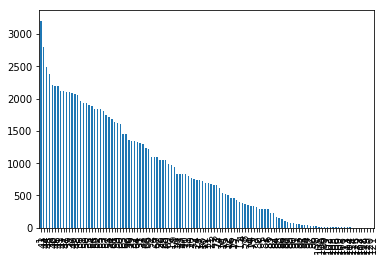

In [75]:
dataset.num_lab_procedures.value_counts().plot(kind='bar')

"num_lab_procedures" may have an effect.

In [76]:
dataset['num_lab_procedures'].value_counts().head()

1     3208
43    2804
44    2496
45    2376
38    2212
Name: num_lab_procedures, dtype: int64

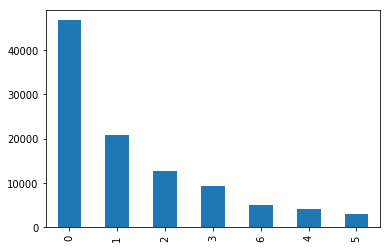

In [77]:
dataset.num_procedures.value_counts().plot(kind='bar')

"num_procedures" may have an effect.

In [78]:
dataset['num_procedures'].value_counts().head()

0    46652
1    20741
2    12716
3     9443
6     4954
Name: num_procedures, dtype: int64

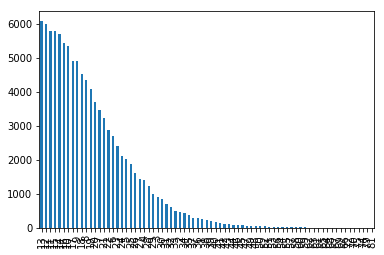

In [79]:
dataset.num_medications.value_counts().plot(kind='bar')

"num_medications" may have an effect.

In [80]:
dataset['num_medications'].value_counts().head()

13    6086
12    6004
11    5795
15    5792
14    5707
Name: num_medications, dtype: int64

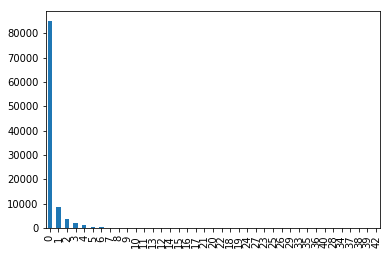

In [81]:
dataset.number_outpatient.value_counts().plot(kind='bar')

In [82]:
dataset['number_outpatient'].value_counts().head()

0    85024
1     8547
2     3594
3     2042
4     1099
Name: number_outpatient, dtype: int64

No significant variance, "number_outpatient" will be ignored.

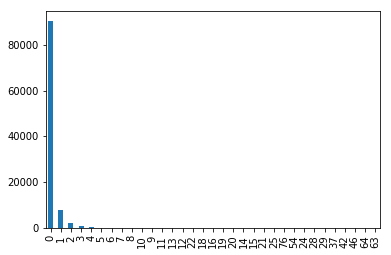

In [83]:
dataset.number_emergency.value_counts().plot(kind='bar')

In [84]:
dataset['number_emergency'].value_counts().head()

0    90380
1     7677
2     2042
3      725
4      374
Name: number_emergency, dtype: int64

No significant variance, "number_emergency" will be ignored.

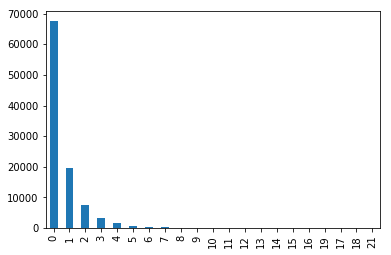

In [85]:
dataset.number_inpatient.value_counts().plot(kind='bar')

In [86]:
dataset['number_inpatient'].value_counts().head()

0    67627
1    19521
2     7566
3     3411
4     1622
Name: number_inpatient, dtype: int64

"number_inpatient" may have an effect.

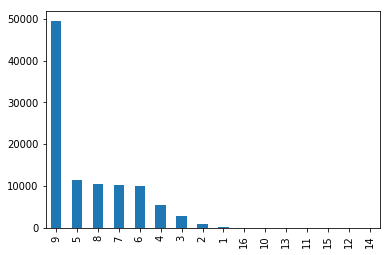

In [87]:
dataset.number_diagnoses.value_counts().plot(kind='bar')

"number_diagnoses" may have an effect.

In [88]:
dataset['number_diagnoses'].value_counts().head()

9    49473
5    11392
8    10616
7    10393
6    10161
Name: number_diagnoses, dtype: int64

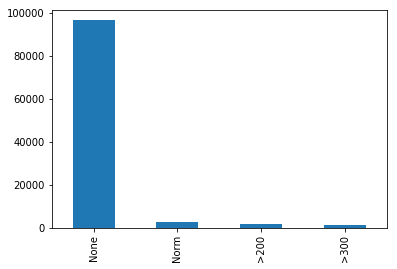

In [89]:
dataset.max_glu_serum.value_counts().plot(kind='bar')

"max_glu_serum" may have an effect on the readmission status, but as there is no significant variance here, it will be ignored.
Surveys and more data collections are needed for future analysis.

In [90]:
dataset['max_glu_serum'].value_counts().head()

None    96417
Norm     2597
>200     1485
>300     1264
Name: max_glu_serum, dtype: int64

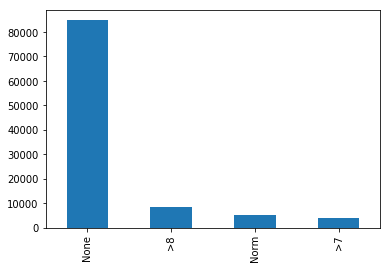

In [91]:
dataset.A1Cresult.value_counts().plot(kind='bar')

"A1Cresult" may have an effect on the readmission status, but as there is no significant variance here, it will be ignored. Surveys and more data collections are needed for future analysis.

In [92]:
dataset['A1Cresult'].value_counts().head()

None    84745
>8       8216
Norm     4990
>7       3812
Name: A1Cresult, dtype: int64

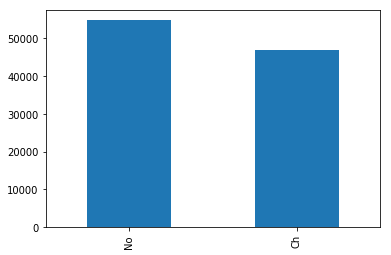

In [93]:
dataset.change.value_counts().plot(kind='bar')

"change" is considered in the final analysis.

In [94]:
dataset['change'].value_counts().head()

No    54754
Ch    47009
Name: change, dtype: int64

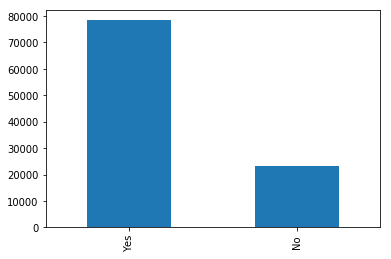

In [95]:
dataset.diabetesMed.value_counts().plot(kind='bar')

"diabetesMed" is considered in the final analysis.

In [96]:
dataset['diabetesMed'].value_counts().head()

Yes    78361
No     23402
Name: diabetesMed, dtype: int64

In [97]:
# ICD9 Codes for diag_1, diag_2 and diag_3
def ICD9_classifier(diagnoses):
    # Returns a series of strings corresponding to type of ICD9 diagnosis
    # diagnoses is a list
    gr_diagnoses = diagnoses.copy()
    icd9_dct = {
                'Infectious':(1, 139),
                'Neoplasmic':(140,239),
                'Hormonal':(240, 279),
                'Blood':(280,289),
                'Mental':(290,319),
                'Nervous':(320,359),
                'Sensory':(360,389),
                'Circulatory':(390,459),
                'Respiratory':(460,519),
                'Digestive':(520,579),
                'Genitourinary':(580,629),
                'Childbirth':(630,679),
                'Dermatological':(680,709),
                'Musculoskeletal':(710,739),
                'Congenital':(740,759),
                'Perinatal':(760,779),
                'Miscellaneous':(780,799),
                'Injury':(800,999)
               }
    for i, diagnosis in enumerate(diagnoses):
        if (str(diagnoses[i])[0] == 'E') or (str(diagnoses[i])[0] == 'V'):
            gr_diagnoses[i] = 'Accidental'
        elif (str(diagnoses[i]).lower() == 'nan'):
            gr_diagnoses[i] = 'NaN'
        else:
            for key, icd_range in icd9_dct.items():
                if (int(float(diagnoses[i])) >= icd_range[0]) and (int(float(diagnoses[i])) <= icd_range[1]):
                    gr_diagnoses[i] = key
    return gr_diagnoses

In [98]:
d1 = ICD9_classifier(dataset.diag_1.values)
d2 = ICD9_classifier(dataset.diag_2.values)
d3 = ICD9_classifier(dataset.diag_3.values)


dataset.diag_1 = d1
dataset.diag_2 = d2
dataset.diag_3 = d3

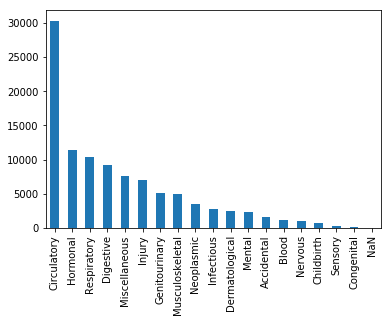

In [99]:
dataset.diag_1.value_counts().plot(kind='bar')

"diag_1" may have an impact on the readmission status.

In [100]:
dataset['diag_1'].value_counts().head()

Circulatory      30335
Hormonal         11459
Respiratory      10407
Digestive         9208
Miscellaneous     7636
Name: diag_1, dtype: int64

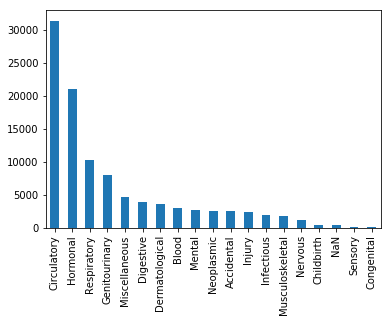

In [101]:
dataset.diag_2.value_counts().plot(kind='bar')

"diag_2" may have an impact on the readmission status.

In [102]:
dataset['diag_2'].value_counts().head()

Circulatory      31364
Hormonal         21017
Respiratory      10251
Genitourinary     7987
Miscellaneous     4632
Name: diag_2, dtype: int64

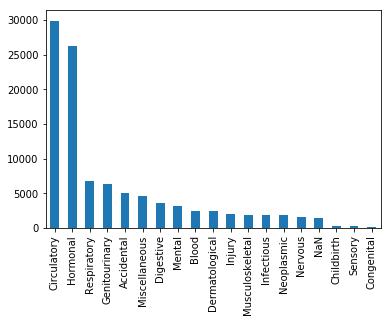

In [103]:
dataset.diag_3.value_counts().plot(kind='bar')

"diag_3" may have an impact on the readmission status.

In [104]:
dataset['diag_3'].value_counts().head()

Circulatory      29917
Hormonal         26308
Respiratory       6774
Genitourinary     6327
Accidental        5057
Name: diag_3, dtype: int64